In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

 Load the dataset

In [ ]:
data = pd.read_csv('/content/Aggregation.txt', sep='\s+', header=None)
X = data.values

In [ ]:
data.head()

,0,1,2
0,15.55,28.65,2
1,14.90,27.55,2
2,14.45,28.35,2
3,14.15,28.80,2
4,13.75,28.05,2


# Part_One

 Run k-means for k = 1 to 10


In [ ]:
costs = []
models = []
silhouette_scores = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    models.append(kmeans)
    costs.append(kmeans.inertia_)
    if k > 1:
        silhouette_scores.append(silhouette_score(X, kmeans.labels_))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

 Plot the cost function

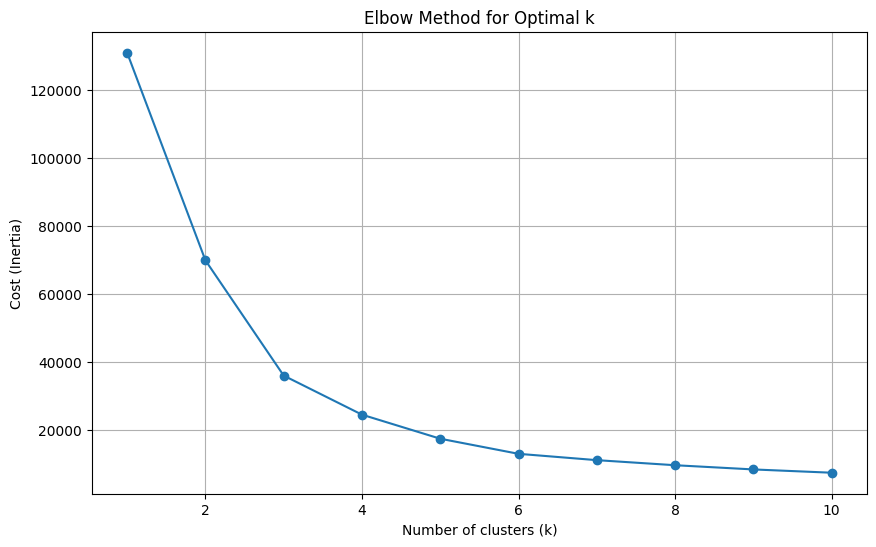

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), costs, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Cost (Inertia)')
plt.grid(True)
plt.show()

Find the optimal k using the elbow method


In [ ]:
optimal_k = np.argmax(np.diff(costs)) + 1
print(f'Optimal k: {optimal_k}')

Optimal k: 9


Plot classification results for 5 best models

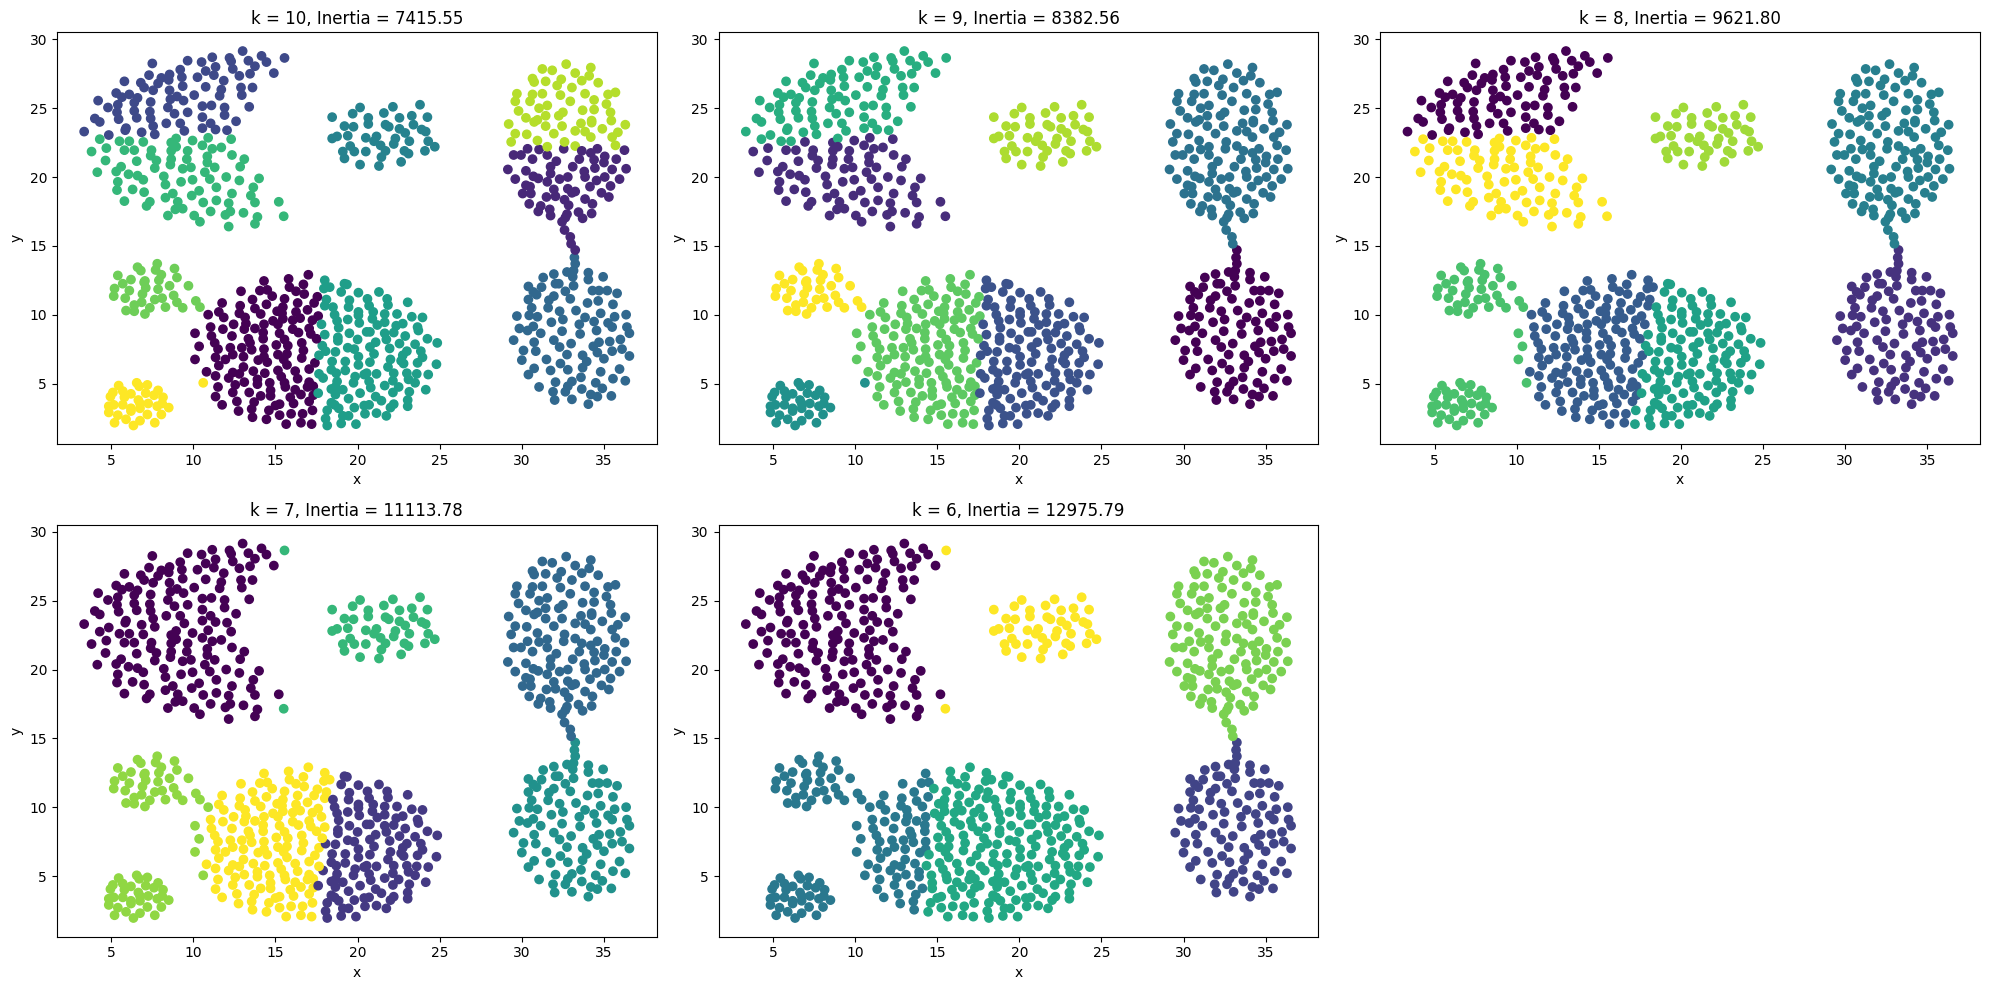

In [ ]:
best_k = sorted(range(1, 11), key=lambda k: costs[k-1])[:5]

plt.figure(figsize=(20, 10))
for i, k in enumerate(best_k):
    plt.subplot(2, 3, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=models[k-1].labels_, cmap='viridis')
    plt.title(f'k = {k}, Inertia = {costs[k-1]:.2f}')
    plt.xlabel('x')
    plt.ylabel('y')

plt.tight_layout()
plt.show()

# Part_Two


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN
from sklearn.metrics import mean_squared_error

Define ranges for MinPts and ε

In [ ]:
min_pts_values = range(3, 15)
epsilon_values = np.linspace(0.1, 2.0, 10)

Run DBSCAN for all combinations of MinPts and ε


In [ ]:
results = []

for min_pts in min_pts_values:
    for eps in epsilon_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_pts)
        labels = dbscan.fit_predict(X)

        if len(set(labels)) > 1:
            core_samples_mask = np.zeros_like(labels, dtype=bool)
            core_samples_mask[dbscan.core_sample_indices_] = True
            mse = mean_squared_error(X[core_samples_mask], dbscan.components_)
        else:
            mse = float('inf')

        results.append((min_pts, eps, mse, labels))

results_df = pd.DataFrame(results, columns=['MinPts', 'Epsilon', 'MSE', 'Labels'])

Plot the MSE diagram

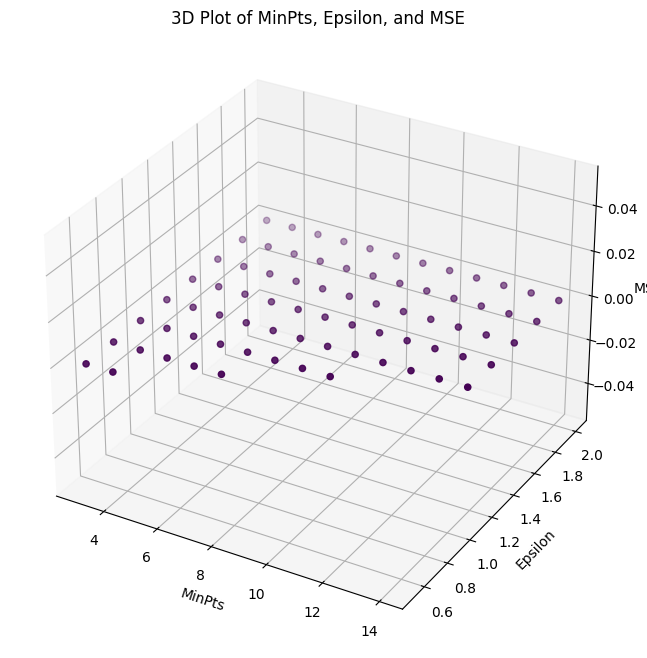

In [ ]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(results_df['MinPts'], results_df['Epsilon'], results_df['MSE'], c=results_df['MSE'], cmap='viridis')
ax.set_xlabel('MinPts')
ax.set_ylabel('Epsilon')
ax.set_zlabel('MSE')
ax.set_title('3D Plot of MinPts, Epsilon, and MSE')
plt.show()

Plot classification results for 5 best models

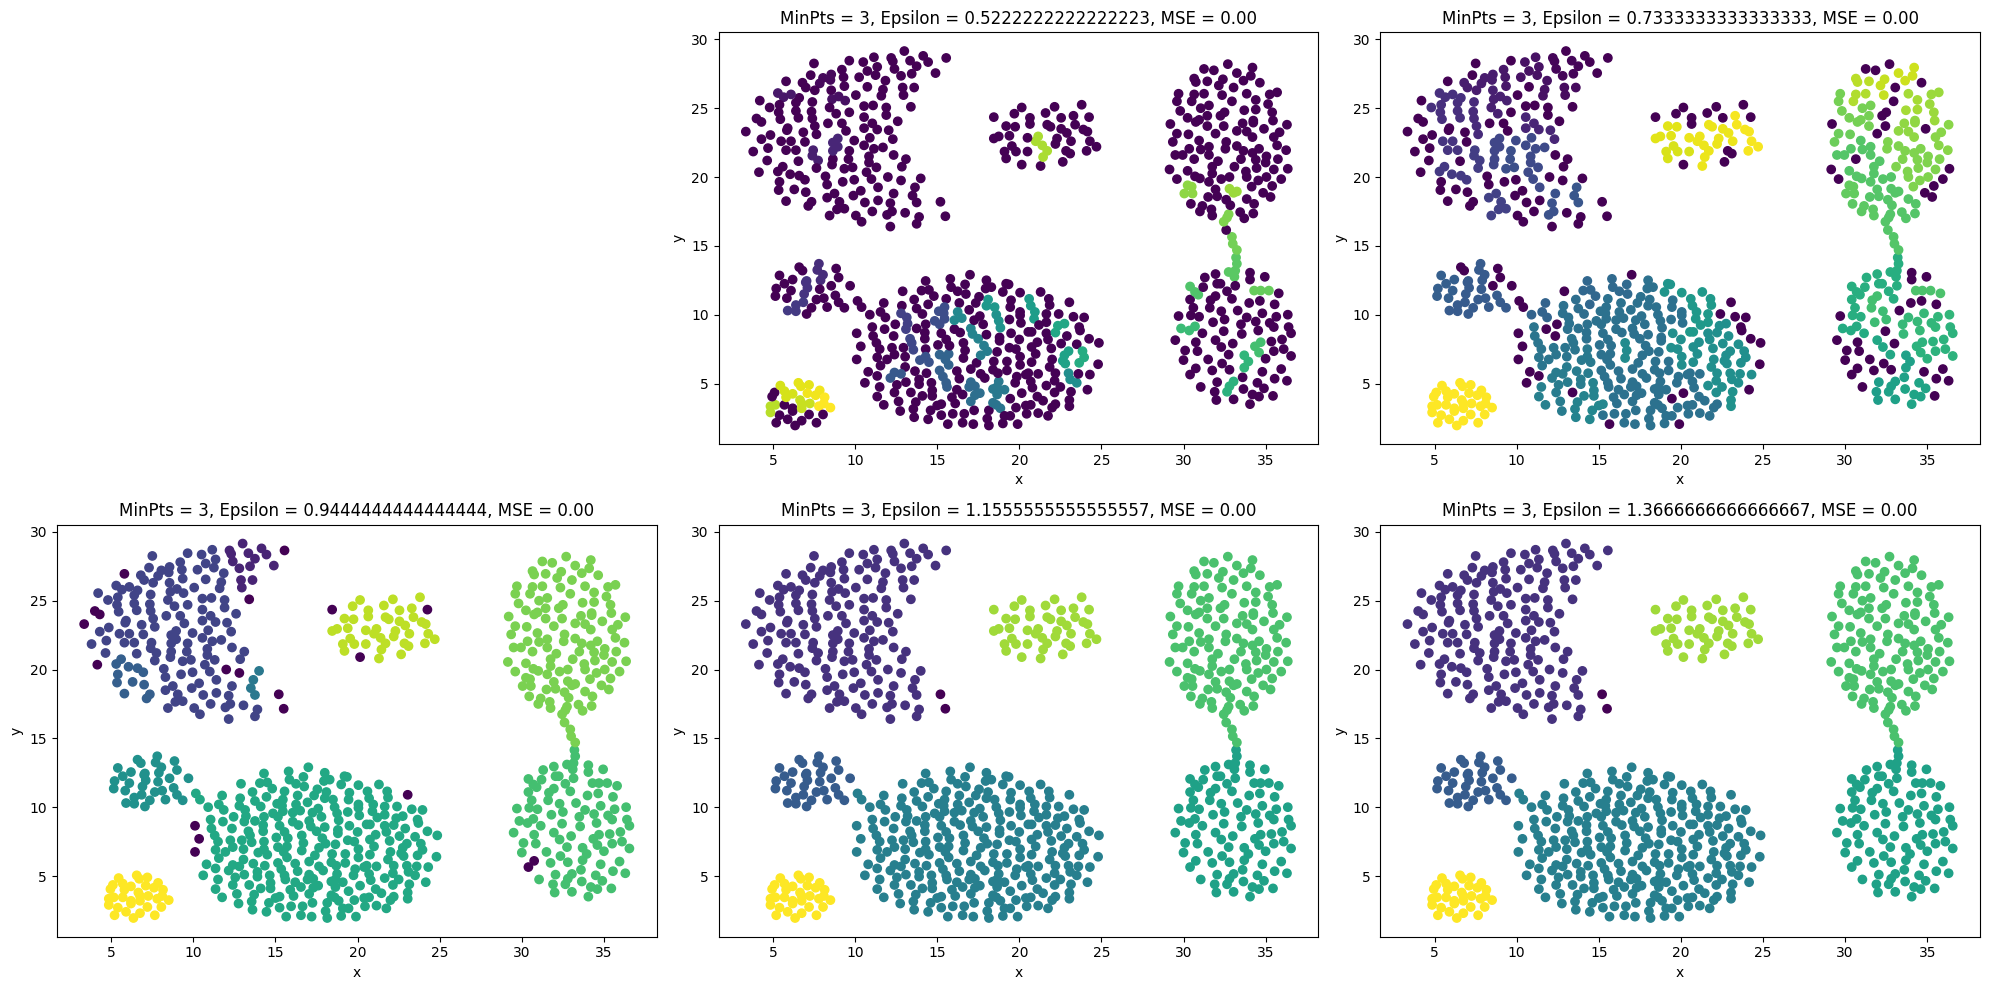

In [ ]:
best_results = results_df.nsmallest(5, 'MSE')

plt.figure(figsize=(20, 10))
for i, row in best_results.iterrows():
    plt.subplot(2, 3, i )
    plt.scatter(X[:, 0], X[:, 1], c=row['Labels'], cmap='viridis')
    plt.title(f'MinPts = {row["MinPts"]}, Epsilon = {row["Epsilon"]}, MSE = {row["MSE"]:.2f}')
    plt.xlabel('x')
    plt.ylabel('y')

plt.tight_layout()
plt.show()

# Part_Three

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles, make_moons, make_blobs
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score

Generate datasets

In [ ]:
datasets = {
    "noisy_circles": make_circles(n_samples=1000, factor=0.5, noise=0.05),
    "noisy_moons": make_moons(n_samples=1000, noise=0.05),
    "blobs": make_blobs(n_samples=1000, centers=3, cluster_std=1.0),
    "no_structure": (np.random.rand(1000, 2), None)
}

Plot datasets

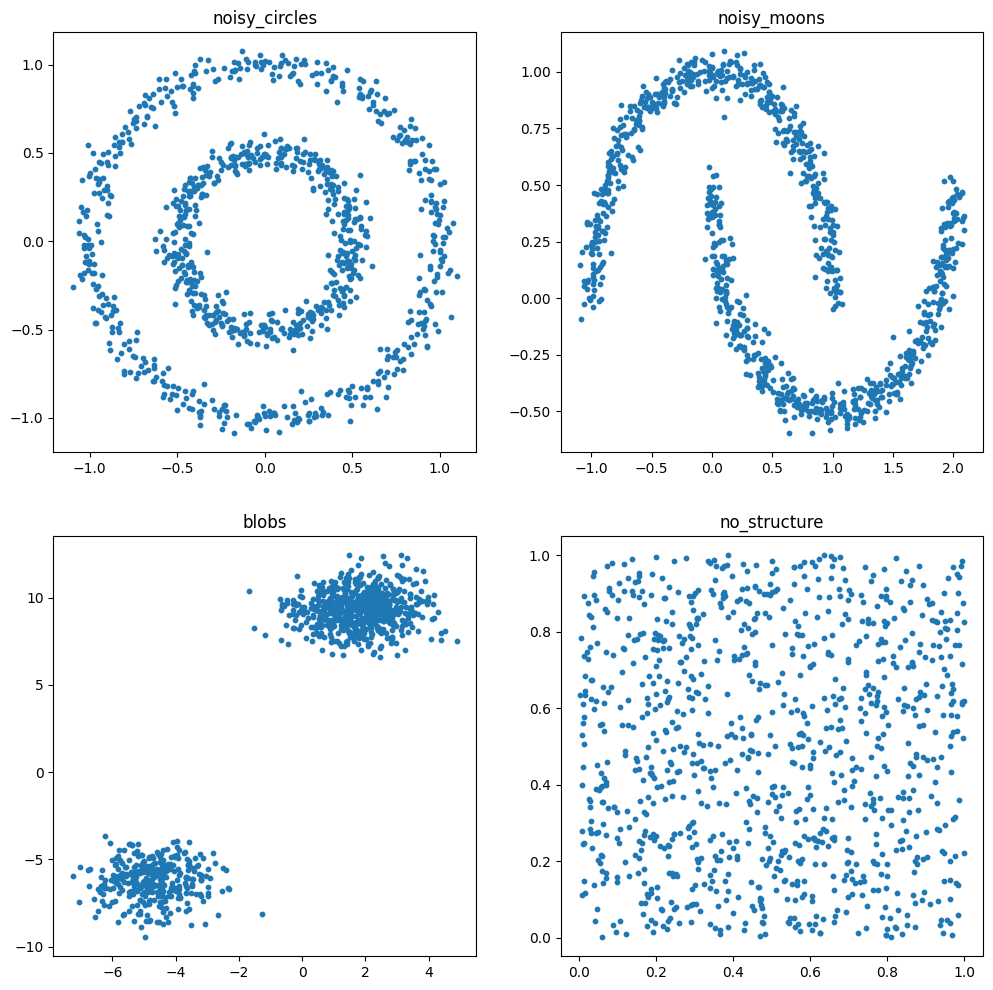

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
for ax, (name, (X, y)) in zip(axs.ravel(), datasets.items()):
    ax.scatter(X[:, 0], X[:, 1], s=10)
    ax.set_title(name)
plt.show()

Function to plot clustering results

In [ ]:
def plot_clustering_results(X, labels, title, ax):
    ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=10)
    ax.set_title(title)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


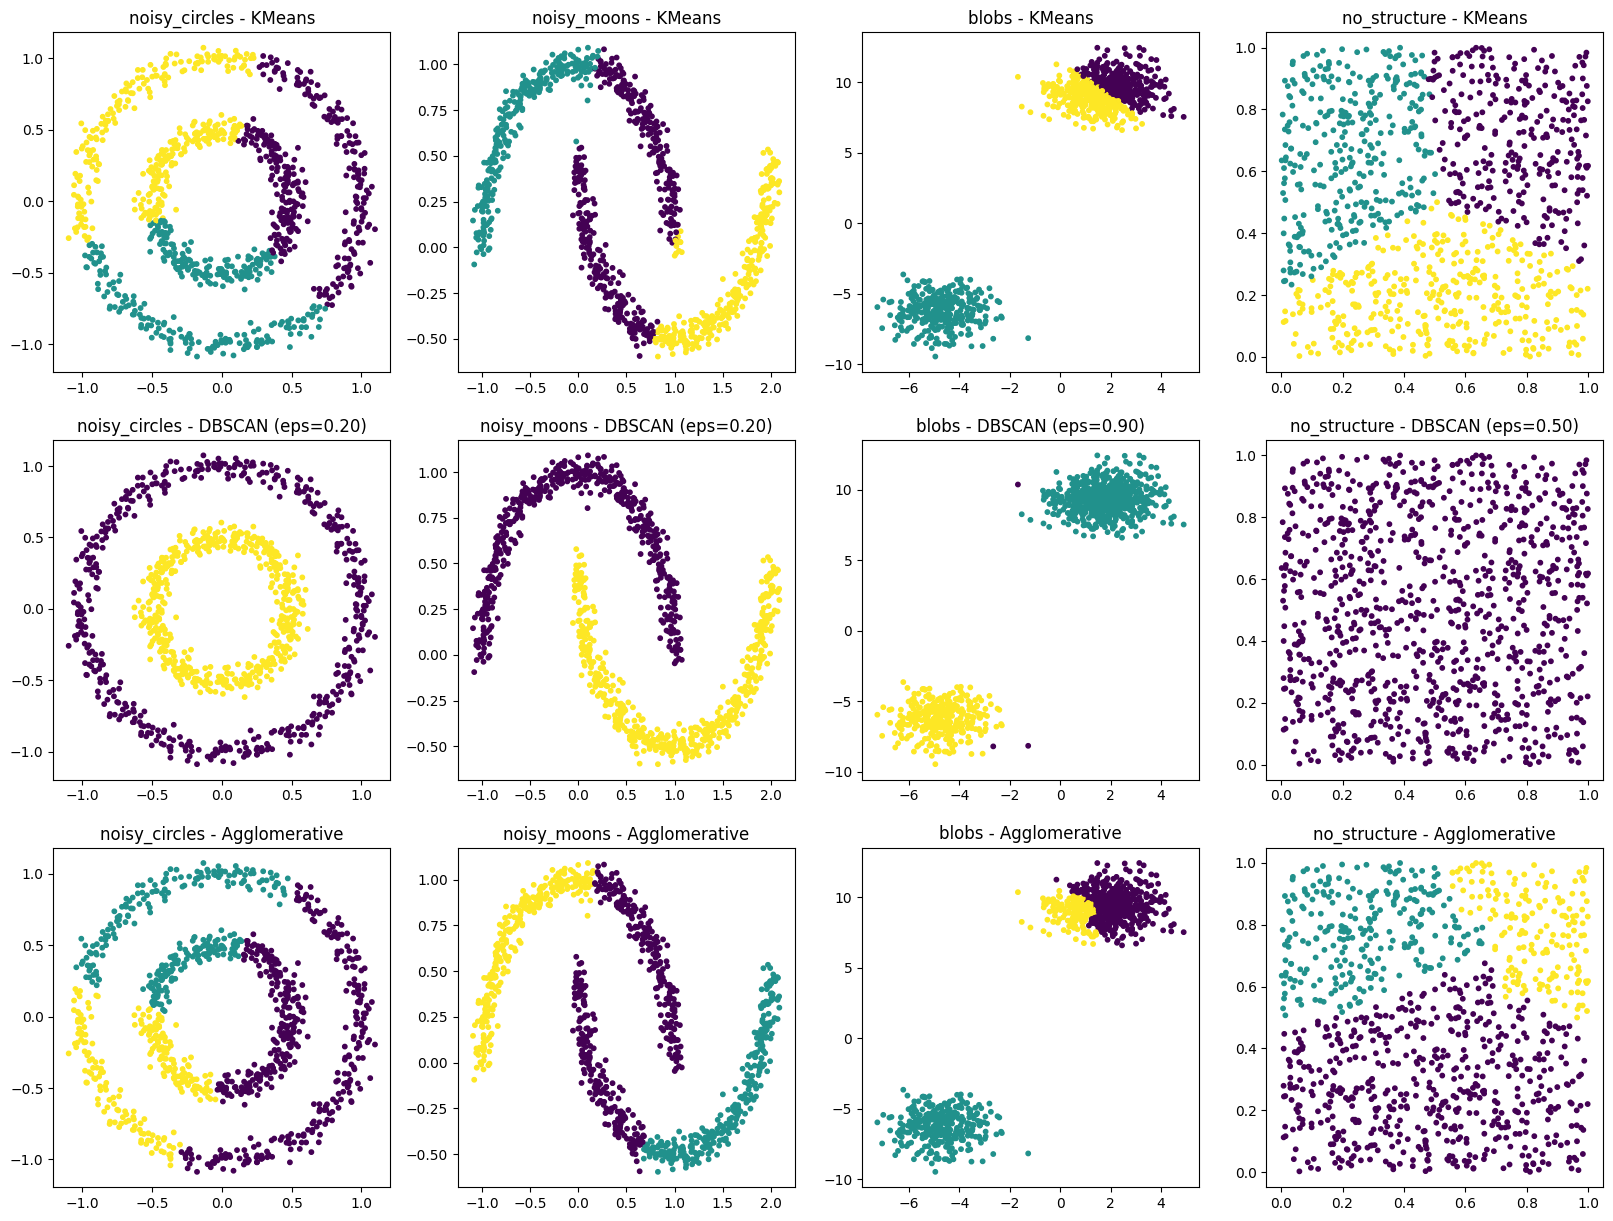

In [ ]:

fig, axs = plt.subplots(3, 4, figsize=(20, 15))

for col, (name, (X, y)) in enumerate(datasets.items()):
    # KMeans
    kmeans = KMeans(n_clusters=3, random_state=42)
    kmeans_labels = kmeans.fit_predict(X)
    plot_clustering_results(X, kmeans_labels, f'{name} - KMeans', axs[0, col])

    # DBSCAN
    best_eps = 0.5
    best_score = -1
    for eps in np.linspace(0.1, 1.0, 10):
        dbscan = DBSCAN(eps=eps, min_samples=5)
        dbscan_labels = dbscan.fit_predict(X)
        if len(set(dbscan_labels)) > 1 and len(set(dbscan_labels)) < len(X):
            score = silhouette_score(X, dbscan_labels)
            if score > best_score:
                best_score = score
                best_eps = eps

    dbscan = DBSCAN(eps=best_eps, min_samples=5)
    dbscan_labels = dbscan.fit_predict(X)
    plot_clustering_results(X, dbscan_labels, f'{name} - DBSCAN (eps={best_eps:.2f})', axs[1, col])

    # Agglomerative Clustering
    agg = AgglomerativeClustering(n_clusters=3)
    agg_labels = agg.fit_predict(X)
    plot_clustering_results(X, agg_labels, f'{name} - Agglomerative', axs[2, col])

In [ ]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>